In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
from sklearn.metrics import f1_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import brier_score_loss
from sklearn.calibration import calibration_curve

### LSGBERT + BiGRU

In [4]:
# EXPECTED CALIBRATION ERROR

# https://towardsdatascience.com/expected-calibration-error-ece-a-step-by-step-visual-explanation-with-python-code-c3e9aa12937d#:~:text=Definition,into%20M%20equally%20spaced%20bins.

def expected_calibration_error(samples, true_labels, M=10):
    # uniform binning approach with M number of bins
    bin_boundaries = np.linspace(0, 1, M + 1)
    bin_lowers = bin_boundaries[:-1]
    bin_uppers = bin_boundaries[1:]

   # keep confidences / predicted "probabilities" as they are
    confidences = samples
    # get binary class predictions from confidences
    predicted_label = (samples>0.5).astype(float)

    # get a boolean list of correct/false predictions
    accuracies = predicted_label==true_labels

    ece = np.zeros(1)
    for bin_lower, bin_upper in zip(bin_lowers, bin_uppers):
        # determine if sample is in bin m (between bin lower & upper)
        in_bin = np.logical_and(confidences > bin_lower.item(), confidences <= bin_upper.item())
        # can calculate the empirical probability of a sample falling into bin m: (|Bm|/n)
        prop_in_bin = in_bin.astype(float).mean()

        if prop_in_bin.item() > 0:
            # get the accuracy of bin m: acc(Bm)
            accuracy_in_bin = accuracies[in_bin].astype(float).mean()
            # get the average confidence of bin m: conf(Bm)
            avg_confidence_in_bin = confidences[in_bin].mean()
            # calculate |acc(Bm) - conf(Bm)| * (|Bm|/n) for bin m and add to the total ECE
            ece += np.abs(avg_confidence_in_bin - accuracy_in_bin) * prop_in_bin
    return ece

In [5]:
df_test = pd.read_csv('/content/drive/MyDrive/Thesis/calibration/test_preds_lsgbert_bigru.csv')

pred_0 = df_test[df_test['Test_labels'] == 0]['Test_pred']
pred_1 = df_test[df_test['Test_labels'] == 1]['Test_pred']

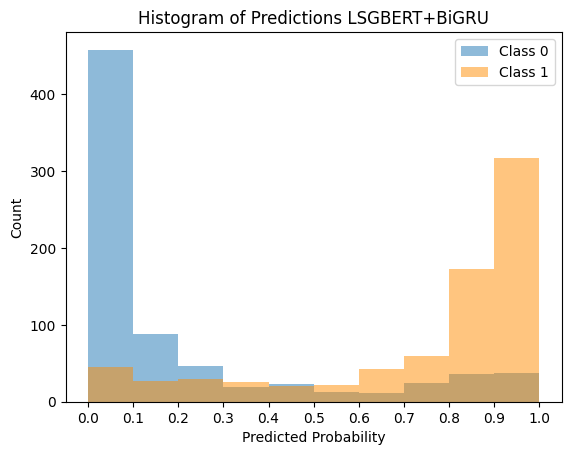

In [ ]:
# Istogramma delle predizioni
orange = '#FF8C00'
bins = np.arange(0, 1.1, step=0.1)
plt.hist(pred_0, bins=bins, alpha=0.5, label='Class 0')
plt.hist(pred_1, bins=bins, color=orange, alpha=0.5, label='Class 1')
plt.xticks(bins)
plt.xlabel('Predicted Probability')
plt.ylabel('Count')
plt.legend()
plt.title("Histogram of Predictions LSGBERT+BiGRU")

plt.savefig('/content/drive/MyDrive/Thesis/calibration/images/histogram_lsgbert_bigru.eps', format='eps', bbox_inches='tight')
plt.savefig('/content/drive/MyDrive/Thesis/calibration/images/histogram_lsgbert_bigru.png', format='png', bbox_inches='tight')
plt.show()


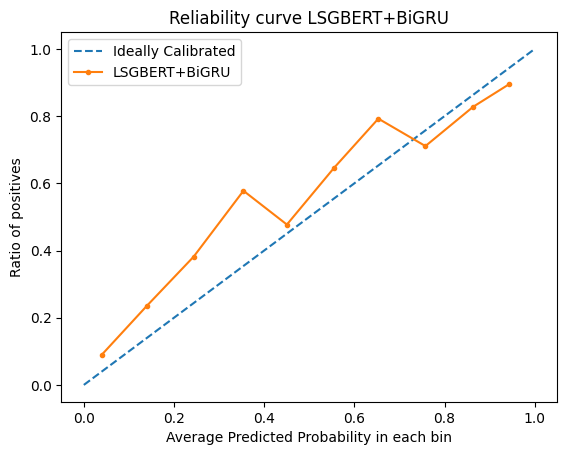

In [ ]:
# Calibration curve
x, y = calibration_curve(df_test['Test_labels'], df_test['Test_pred'], n_bins = 10)

# Plot calibration curve

# Plot perfectly calibrated
plt.plot([0, 1], [0, 1], linestyle = '--', label = 'Ideally Calibrated')

# Plot model's calibration curve
plt.plot(y, x, marker = '.', label = 'LSGBERT+BiGRU')

leg = plt.legend(loc = 'upper left')
plt.xlabel('Average Predicted Probability in each bin')
plt.ylabel('Ratio of positives')
plt.title("Reliability curve LSGBERT+BiGRU")

plt.savefig('/content/drive/MyDrive/Thesis/calibration/images/cal_curve_lsgbert_bigru.eps', format='eps', bbox_inches='tight')
plt.savefig('/content/drive/MyDrive/Thesis/calibration/images/cal_curve_lsgbert_bigru.png', format='png', bbox_inches='tight')

plt.show()

In [ ]:
ece = expected_calibration_error( df_test['Test_pred'],  df_test['Test_labels'])
print("THE EXPECTED CALIBRATION ERROR IS ", ece)

THE EXPECTED CALIBRATION ERROR IS  [0.38504757]


In [ ]:
# Brier score
brier = brier_score_loss(df_test['Test_labels'], df_test['Test_pred'])
print("Brier score:", brier)

Brier score: 0.135111516916384


### LSGBERT

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/Thesis/calibration/test_preds_lsgbert2560.csv')

pred_0 = df_test[df_test['Test_labels'] == 0]['Test_pred']
pred_1 = df_test[df_test['Test_labels'] == 1]['Test_pred']

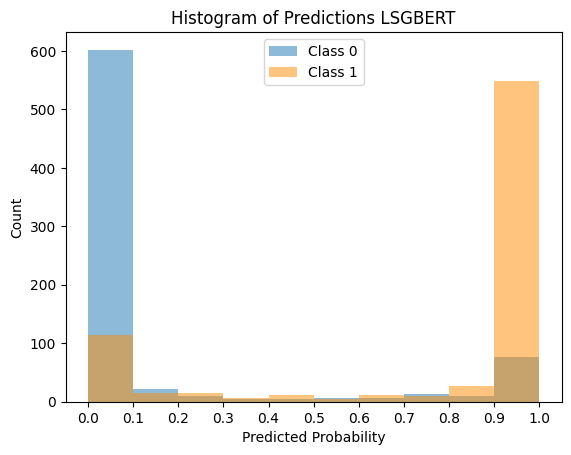

In [ ]:
# Istogramma delle predizioni
orange = '#FF8C00'
bins = np.arange(0, 1.1, step=0.1)
plt.hist(pred_0, bins=bins, alpha=0.5, label='Class 0')
plt.hist(pred_1, bins=bins, color=orange, alpha=0.5, label='Class 1')
plt.xticks(bins)
plt.xlabel('Predicted Probability')
plt.ylabel('Count')
plt.legend(loc = 'upper center')
plt.title("Histogram of Predictions LSGBERT")

plt.savefig('/content/drive/MyDrive/Thesis/calibration/images/histogram_lsgbert2560.eps', format='eps', bbox_inches='tight')
plt.savefig('/content/drive/MyDrive/Thesis/calibration/images/histogram_lsgbert2560.png', format='png', bbox_inches='tight')
plt.show()


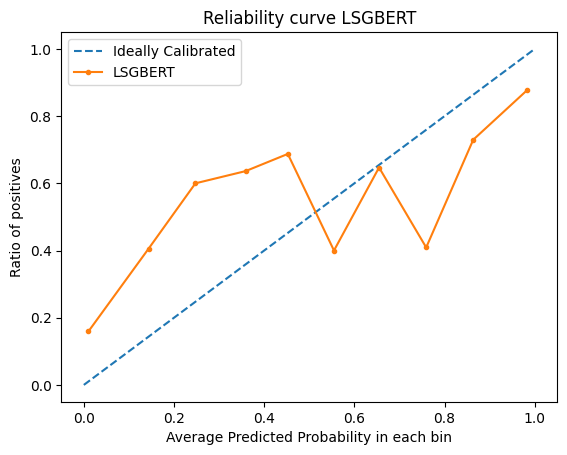

In [ ]:
# Calibration curve
x, y = calibration_curve(df_test['Test_labels'], df_test['Test_pred'], n_bins = 10)

# Plot calibration curve

# Plot perfectly calibrated
plt.plot([0, 1], [0, 1], linestyle = '--', label = 'Ideally Calibrated')

# Plot model's calibration curve
plt.plot(y, x, marker = '.', label = 'LSGBERT')

leg = plt.legend(loc = 'upper left')
plt.xlabel('Average Predicted Probability in each bin')
plt.ylabel('Ratio of positives')
plt.title("Reliability curve LSGBERT")

plt.savefig('/content/drive/MyDrive/Thesis/calibration/images/cal_curve_lsgbert2560.eps', format='eps', bbox_inches='tight')
plt.savefig('/content/drive/MyDrive/Thesis/calibration/images/cal_curve_lsgbert2560.png', format='png', bbox_inches='tight')

plt.show()

In [ ]:
ece = expected_calibration_error( df_test['Test_pred'],  df_test['Test_labels'])
print("THE EXPECTED CALIBRATION ERROR IS ", ece)

THE EXPECTED CALIBRATION ERROR IS  [0.46019267]


In [ ]:
# Brier score
brier = brier_score_loss(df_test['Test_labels'], df_test['Test_pred'])
print("Brier score:", brier)

Brier score: 0.15441079429366808


### CaseLawBERT + BiGRU

In [6]:
df_test = pd.read_csv('/content/drive/MyDrive/Thesis/calibration/test_preds_caselawbert_bigru')

pred_0 = df_test[df_test['Test_labels'] == 0]['Test_pred']
pred_1 = df_test[df_test['Test_labels'] == 1]['Test_pred']

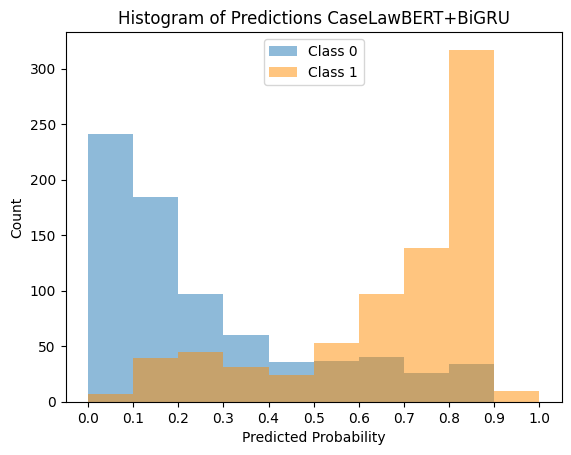

In [7]:
# Istogramma delle predizioni
orange = '#FF8C00'
bins = np.arange(0, 1.1, step=0.1)
plt.hist(pred_0, bins=bins, alpha=0.5, label='Class 0')
plt.hist(pred_1, bins=bins, color=orange, alpha=0.5, label='Class 1')
plt.xticks(bins)
plt.xlabel('Predicted Probability')
plt.ylabel('Count')
plt.legend(loc = 'upper center')
plt.title("Histogram of Predictions CaseLawBERT+BiGRU")

plt.savefig('/content/drive/MyDrive/Thesis/calibration/images/histogram_caselawbert_bigru.eps', format='eps', bbox_inches='tight')
plt.savefig('/content/drive/MyDrive/Thesis/calibration/images/histogram_caselawbert_bigru.png', format='png', bbox_inches='tight')
plt.show()


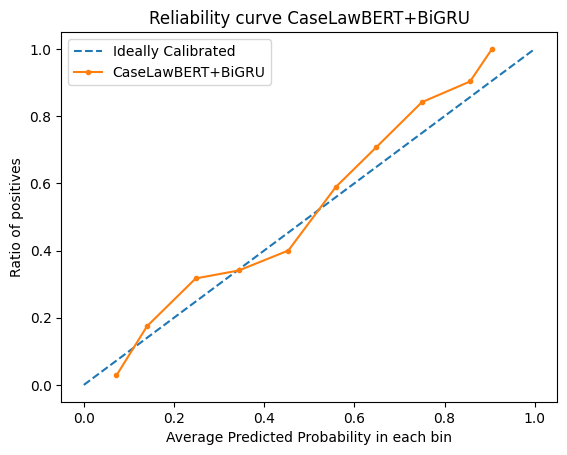

In [ ]:
# Calibration curve
x, y = calibration_curve(df_test['Test_labels'], df_test['Test_pred'], n_bins = 10)

# Plot calibration curve

# Plot perfectly calibrated
plt.plot([0, 1], [0, 1], linestyle = '--', label = 'Ideally Calibrated')

# Plot model's calibration curve
plt.plot(y, x, marker = '.', label = 'CaseLawBERT+BiGRU')

leg = plt.legend(loc = 'upper left')
plt.xlabel('Average Predicted Probability in each bin')
plt.ylabel('Ratio of positives')
plt.title("Reliability curve CaseLawBERT+BiGRU")

plt.savefig('/content/drive/MyDrive/Thesis/calibration/images/cal_curve_caselawbert_bigru.eps', format='eps', bbox_inches='tight')
plt.savefig('/content/drive/MyDrive/Thesis/calibration/images/cal_curve_caselawbert_bigru.png', format='png', bbox_inches='tight')

plt.show()

In [ ]:
ece = expected_calibration_error( df_test['Test_pred'],  df_test['Test_labels'])
print("THE EXPECTED CALIBRATION ERROR IS ", ece)

THE EXPECTED CALIBRATION ERROR IS  [0.34180833]


In [ ]:
# Brier score
brier = brier_score_loss(df_test['Test_labels'], df_test['Test_pred'])
print("Brier score:", brier)

Brier score: 0.13890560707175534


##CaseLawBERT

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/Thesis/calibration/test_preds_caselawbert.csv')

pred_0 = df_test[df_test['Test_labels'] == 0]['Test_pred']
pred_1 = df_test[df_test['Test_labels'] == 1]['Test_pred']

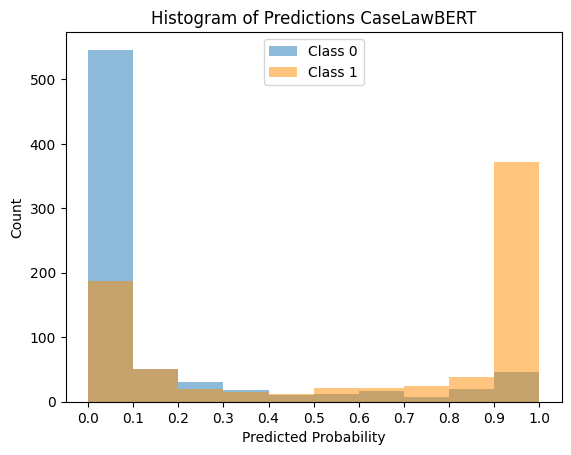

In [ ]:
# Istogramma delle predizioni
orange = '#FF8C00'
bins = np.arange(0, 1.1, step=0.1)
plt.hist(pred_0, bins=bins, alpha=0.5, label='Class 0')
plt.hist(pred_1, bins=bins, color=orange, alpha=0.5, label='Class 1')
plt.xticks(bins)
plt.xlabel('Predicted Probability')
plt.ylabel('Count')
plt.legend(loc = 'upper center')
plt.title("Histogram of Predictions CaseLawBERT")

plt.savefig('/content/drive/MyDrive/Thesis/calibration/images/histogram_caselawbert.eps', format='eps', bbox_inches='tight')
plt.savefig('/content/drive/MyDrive/Thesis/calibration/images/histogram_caselawbert.png', format='png', bbox_inches='tight')
plt.show()


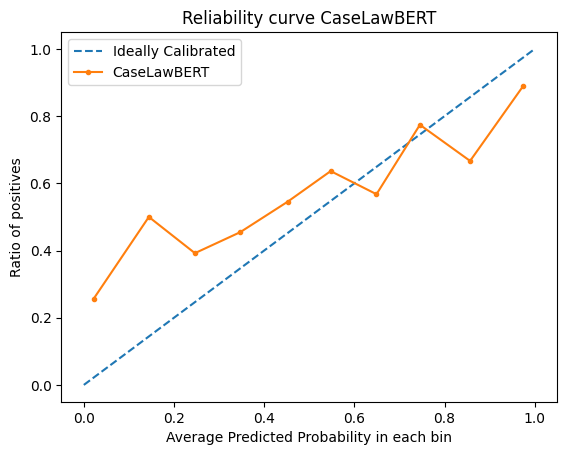

In [ ]:
# Calibration curve
x, y = calibration_curve(df_test['Test_labels'], df_test['Test_pred'], n_bins = 10)

# Plot calibration curve

# Plot perfectly calibrated
plt.plot([0, 1], [0, 1], linestyle = '--', label = 'Ideally Calibrated')

# Plot model's calibration curve
plt.plot(y, x, marker = '.', label = 'CaseLawBERT')

leg = plt.legend(loc = 'upper left')
plt.xlabel('Average Predicted Probability in each bin')
plt.ylabel('Ratio of positives')
plt.title("Reliability curve CaseLawBERT")

plt.savefig('/content/drive/MyDrive/Thesis/calibration/images/cal_curve_caselawbert.eps', format='eps', bbox_inches='tight')
plt.savefig('/content/drive/MyDrive/Thesis/calibration/images/cal_curve_caselawbert.png', format='png', bbox_inches='tight')

plt.show()

In [ ]:
ece = expected_calibration_error( df_test['Test_pred'],  df_test['Test_labels'])
print("THE EXPECTED CALIBRATION ERROR IS ", ece)

THE EXPECTED CALIBRATION ERROR IS  [0.42465996]


In [ ]:
# Brier score
brier = brier_score_loss(df_test['Test_labels'], df_test['Test_pred'])
print("Brier score:", brier)

Brier score: 0.21211022233289678
